In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)

sns.set_style("whitegrid")

PATH  = "../Networks/"

In [2]:
dir_reg   = re.compile(r'.*Networks/(.+)_Student_Networks/saved/(student_\d)_([^\/]+)\/(.+)')
err_reg   = re.compile(r'Err:  (\d\.\d+)')

series = {}

for dirpath, dirnames, filenames in os.walk(PATH):

    mtch    = dir_reg.match(dirpath)

    if mtch:

        try:
            with open(dirpath+"/log.txt", "r") as f:
                raw_log = f.readlines()

            dataset, net, config, algo = mtch.group(1), mtch.group(2), mtch.group(3), mtch.group(4)

            if dataset not in series:
                series[dataset] = {}

            if net not in series[dataset]:
                series[dataset][net] = {}

            if config not in series[dataset][net]:
                series[dataset][net][config] = []

            err = pd.Series(err_reg.findall(" ".join(raw_log)), dtype=float)
            
            series[dataset][net][config].append((algo, err))

        except IOError:
            print dirpath, "has no log file."

In [3]:
df    = pd.DataFrame()

for dataset in ["CIFAR_10", "Top_Down"]:
    for net in series[dataset].keys():
        for config in series[dataset][net].keys():
            for algo, data in series[dataset][net][config]:
                col_name = "{0} {1} {2} {3}".format(dataset, net, config, algo)
                df[col_name] = data
                
df.columns

Index([u'CIFAR_10 student_1 N2_H32 reg_logits',
       u'CIFAR_10 student_1 N2_H32 know_dist_T5.0_beta0.05',
       u'CIFAR_10 student_1 N2_H32 baseline',
       u'CIFAR_10 student_1 N2_H64 reg_logits',
       u'CIFAR_10 student_1 N2_H64 know_dist_T5.0_beta0.05',
       u'CIFAR_10 student_1 N2_H64 baseline',
       u'CIFAR_10 student_1 N1_H32 reg_logits',
       u'CIFAR_10 student_1 N1_H32 know_dist_T5.0_beta0.05',
       u'CIFAR_10 student_1 N1_H32 baseline',
       u'Top_Down student_1 7_10 reg_logits',
       u'Top_Down student_1 7_10 know_dist_T5.0_beta0.05',
       u'Top_Down student_1 7_10 baseline',
       u'Top_Down student_1 15_20 reg_logits',
       u'Top_Down student_1 15_20 know_dist_T5.0_beta0.05',
       u'Top_Down student_1 15_20 baseline',
       u'Top_Down student_1 10_15 reg_logits',
       u'Top_Down student_1 10_15 know_dist_T5.0_beta0.05',
       u'Top_Down student_1 10_15 baseline',
       u'Top_Down student_2 18 baseline_hint_based',
       u'Top_Down student_2 1

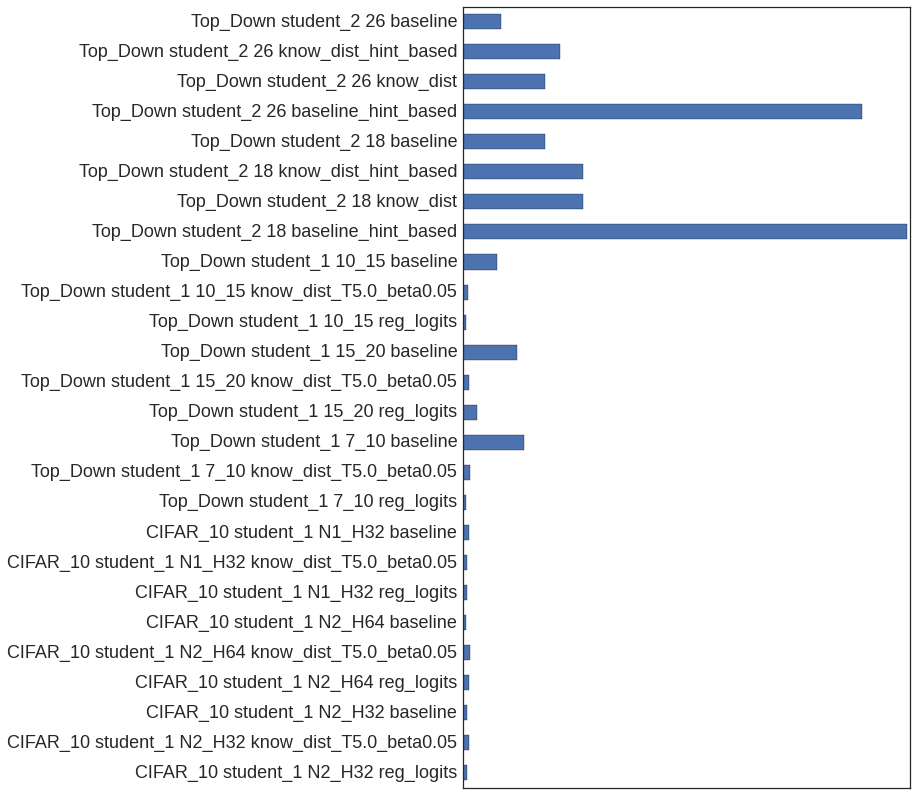

In [4]:
sns.set(style="white", font_scale=1.8)
plt.rcParams['figure.figsize'] = (8, 14)
ax = df.iloc[80:,:].var().plot.barh(stacked=True)
ax.axes.get_xaxis().set_visible(False)

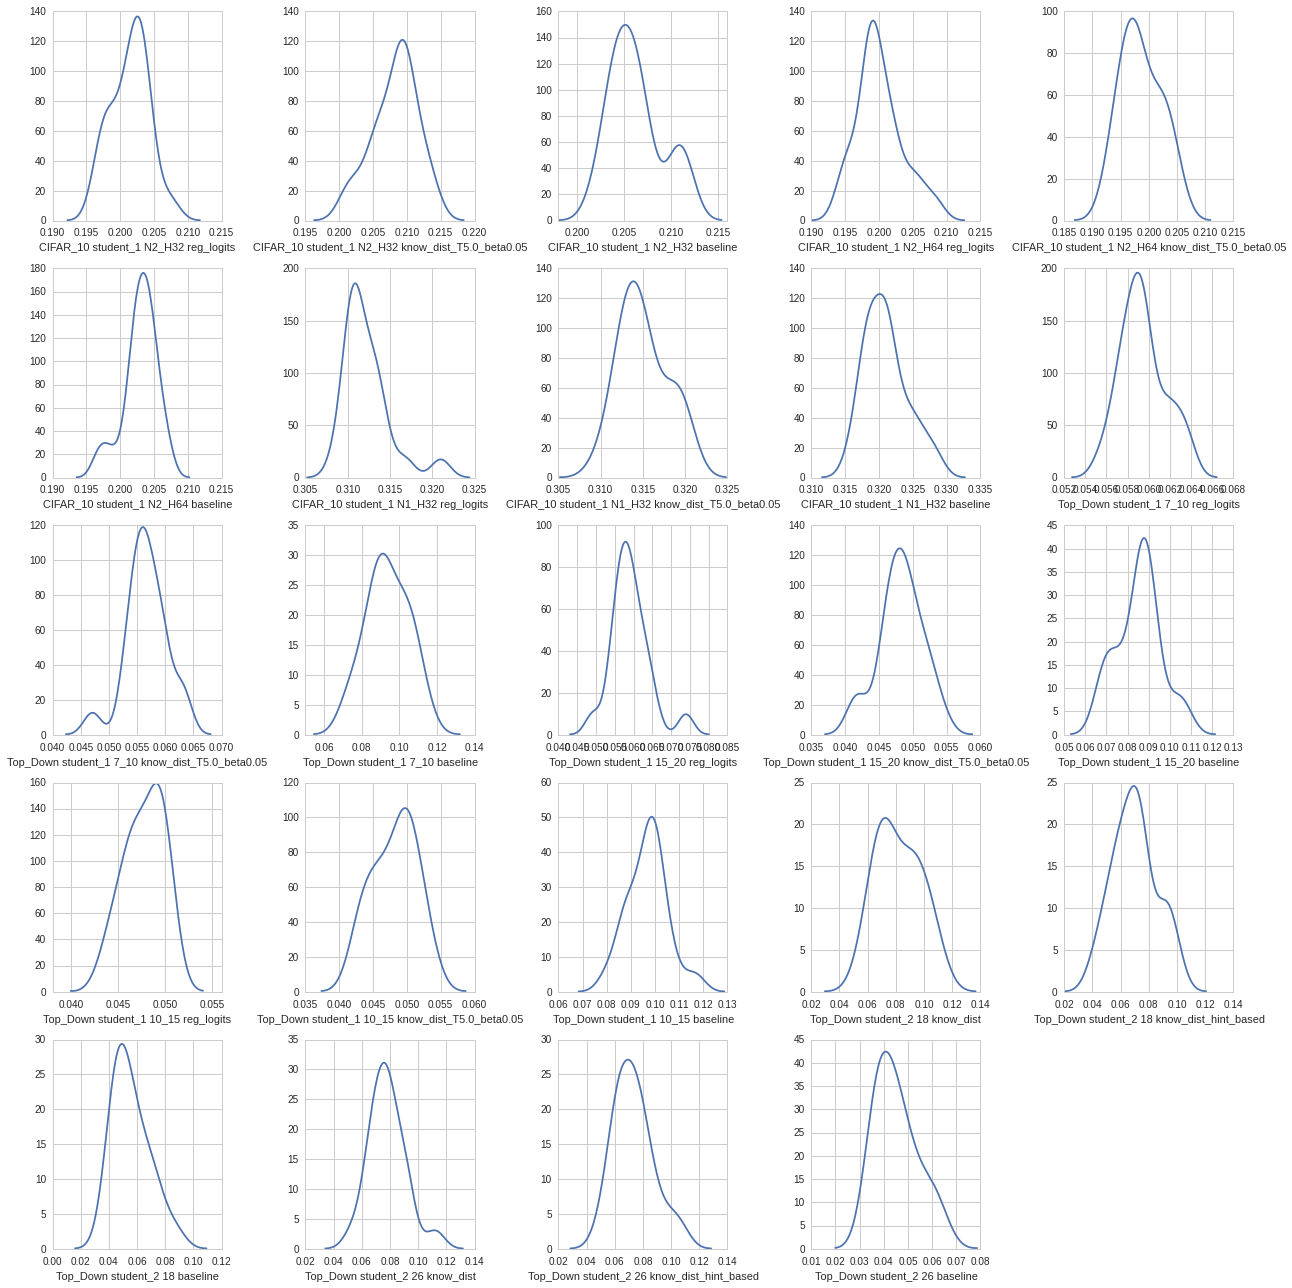

In [5]:
from statsmodels.graphics.gofplots import qqplot

plt.rcParams['figure.figsize'] = (18, 18)
fig = plt.figure()
i=0
for col in df.columns:
    if re.match(r'Top_Down student_2 \d\d baseline_hint_based', col): continue
        
    i+=1
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(df[col].iloc[80:], hist=False, ax=ax)
    
plt.tight_layout()

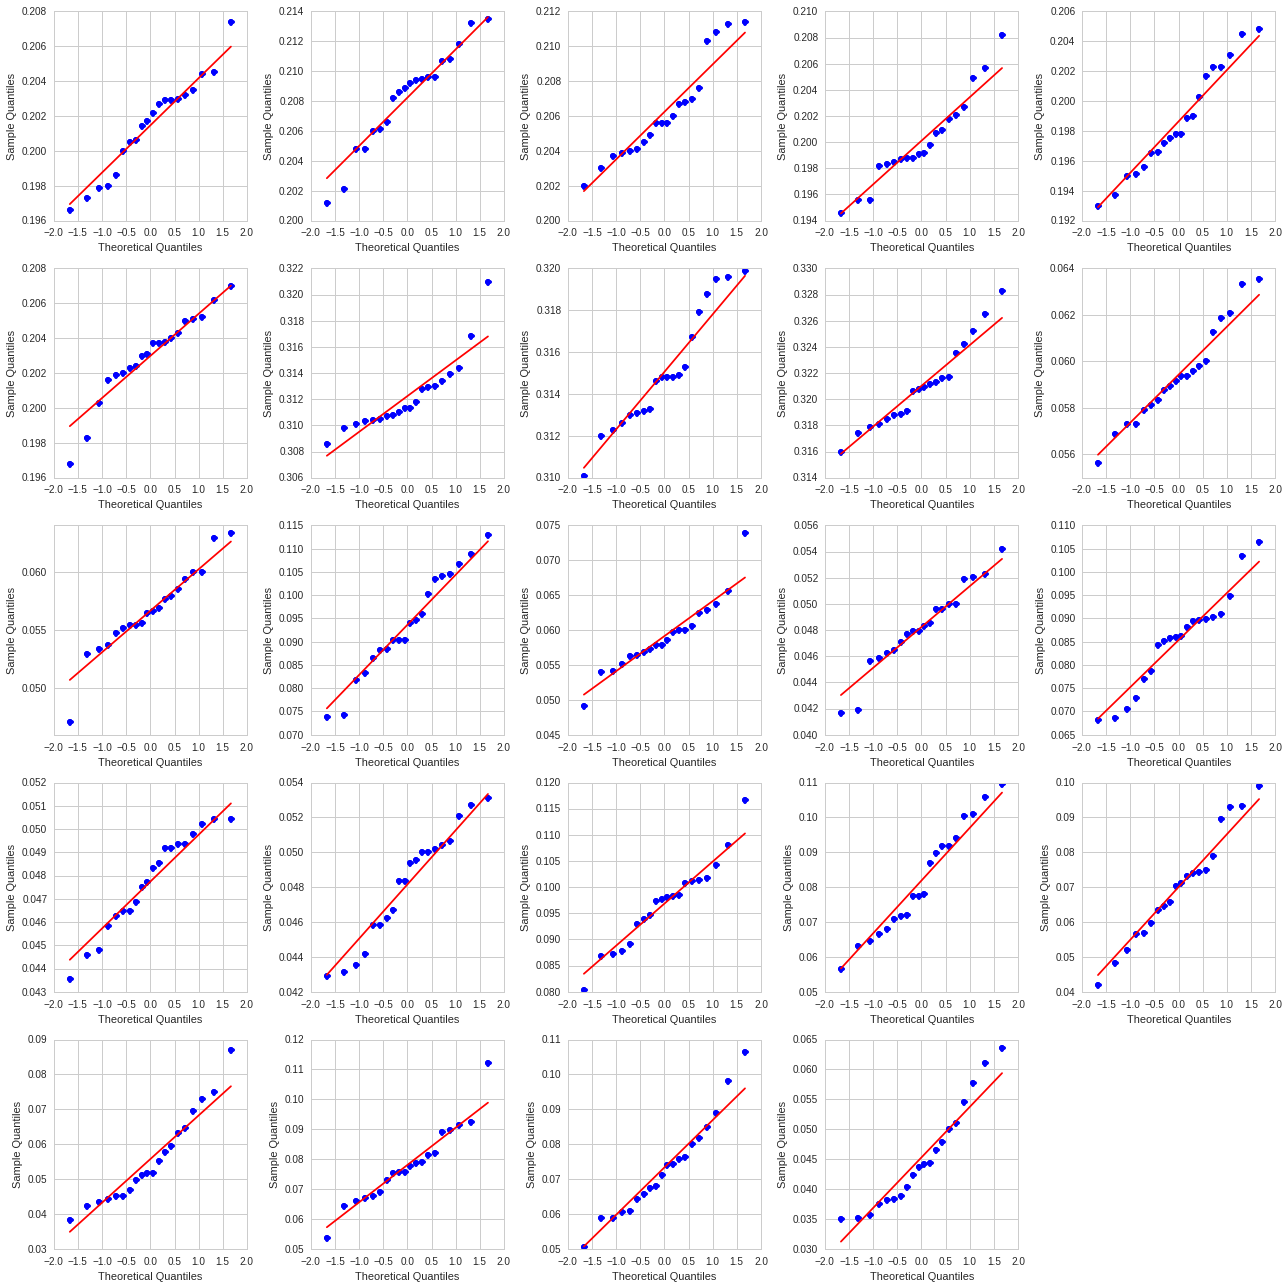

In [41]:
from statsmodels.graphics.gofplots import qqplot

plt.rcParams['figure.figsize'] = (18, 18)
fig = plt.figure()
i=0
for col in df.columns:
    if re.match(r'Top_Down student_2 \d\d baseline_hint_based', col): continue
        
    i+=1
    ax = fig.add_subplot(5, 5, i)
    qqplot(df[col].iloc[80:], line='s', ax=ax)
    
plt.tight_layout()

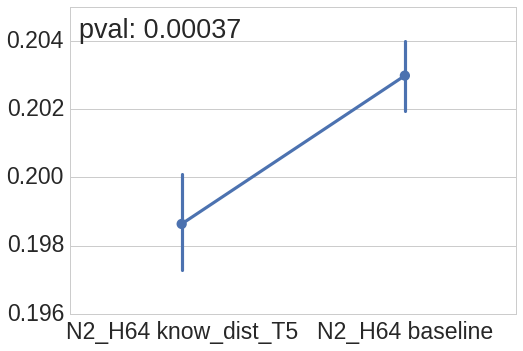

In [83]:
plt.rcParams['figure.figsize'] = (9, 6)

reg = re.compile(r'CIFAR_10 student_1 (N2\w+64 \w+).*')
reg2 = re.compile(r'CIFAR_10 student_1 (N2\w+64 reg).*')

df1 = df[[col for col in df.columns if reg.match(col) and not reg2.match(col)]].copy()
df1.columns = [reg.match(col).group(1) for col in df1.columns]

from scipy.stats import kruskal
statistic, p_val = kruskal(*[df1[col] for col in df1.columns])

sns.set(style="whitegrid", font_scale=2.3)
ax = sns.pointplot(data=df1.iloc[80:])

ax.annotate('pval: {0:.2g}'.format(p_val), (0.02,0.9), xycoords='axes fraction', fontsize=27)

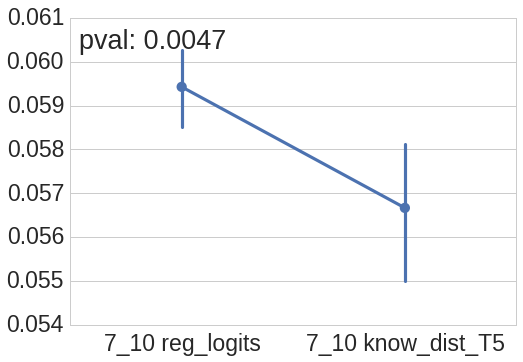

In [96]:
plt.rcParams['figure.figsize'] = (9, 6)

reg = re.compile(r'Top_Down student_1 (7\w+ \w+).*')
reg2 = re.compile(r'Top_Down student_1 (7\w+ base).*')

df1 = df[[col for col in df.columns if reg.match(col) and not reg2.match(col)]].copy()
df1.columns = [reg.match(col).group(1) for col in df1.columns]

from scipy.stats import kruskal
statistic, p_val = kruskal(*[df1[col] for col in df1.columns])


sns.set(style="whitegrid", font_scale=2.3)
ax = sns.pointplot(data=df1.iloc[80:])

ax.annotate('pval: {0:.2g}'.format(p_val), (0.02,0.9), xycoords='axes fraction', fontsize=27)

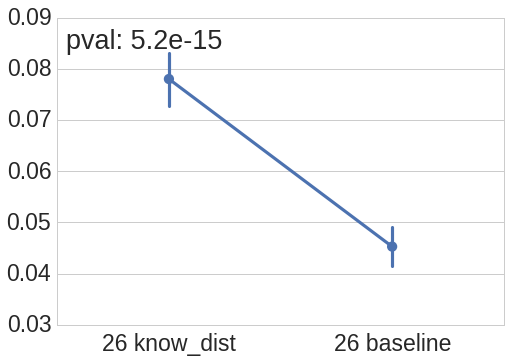

In [100]:
plt.rcParams['figure.figsize'] = (9, 6)

reg  = re.compile(r'Top_Down student_2 (26 \w+).*')
reg2 = re.compile(r'Top_Down student_2 \d\d \w+hint_based$.*')
#reg2 = re.compile(r'Top_Down student_2 \d\d know_dist$.*')
reg3 = re.compile(r'Top_Down student_2 \d\d baseline_hint_based')

df1 = df[[col for col in df.columns if reg.match(col) and not reg2.match(col) and not reg3.match(col)]].copy()
df1.columns = [reg.match(col).group(1) for col in df1.columns]

from scipy.stats import kruskal
statistic, p_val = kruskal(*[df1[col] for col in df1.columns])

sns.set(style="whitegrid", font_scale=2.3)
ax = sns.pointplot(data=df1.iloc[80:])

ax.annotate('pval: {0:.2g}'.format(p_val), (0.02,0.9), xycoords='axes fraction', fontsize=27)

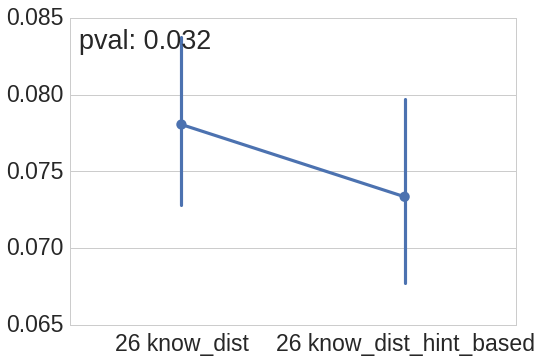

In [102]:
plt.rcParams['figure.figsize'] = (9, 6)

reg  = re.compile(r'Top_Down student_2 (26 \w+).*')
reg2 = re.compile(r'Top_Down student_2 \d\d baseline$.*')
reg3 = re.compile(r'Top_Down student_2 \d\d baseline_hint_based')

df1 = df[[col for col in df.columns if reg.match(col) and not reg2.match(col) and not reg3.match(col)]].copy()
df1.columns = [reg.match(col).group(1) for col in df1.columns]

from scipy.stats import kruskal
statistic, p_val = kruskal(*[df1[col] for col in df1.columns])

sns.set(style="whitegrid", font_scale=2.3)
ax = sns.pointplot(data=df1.iloc[80:])

ax.annotate('pval: {0:.2g}'.format(p_val), (0.02,0.9), xycoords='axes fraction', fontsize=27)

In [12]:
df.iloc[80:].head()

,CIFAR_10 student_1 N2_H32 reg_logits,CIFAR_10 student_1 N2_H32 know_dist_T5.0_beta0.05,CIFAR_10 student_1 N2_H32 baseline,CIFAR_10 student_1 N2_H64 reg_logits,CIFAR_10 student_1 N2_H64 know_dist_T5.0_beta0.05,CIFAR_10 student_1 N2_H64 baseline,CIFAR_10 student_1 N1_H32 reg_logits,CIFAR_10 student_1 N1_H32 know_dist_T5.0_beta0.05,CIFAR_10 student_1 N1_H32 baseline,Top_Down student_1 7_10 reg_logits,...,Top_Down student_1 10_15 know_dist_T5.0_beta0.05,Top_Down student_1 10_15 baseline,Top_Down student_2 18 baseline_hint_based,Top_Down student_2 18 know_dist,Top_Down student_2 18 know_dist_hint_based,Top_Down student_2 18 baseline,Top_Down student_2 26 baseline_hint_based,Top_Down student_2 26 know_dist,Top_Down student_2 26 know_dist_hint_based,Top_Down student_2 26 baseline
80,0.2022,0.2089,0.2056,0.1983,0.2003,0.2020,0.3113,0.3196,0.3206,0.059375,...,0.043125,0.080417,0.073750,0.072083,0.056875,0.057708,0.047708,0.092500,0.067917,0.037500
81,0.1973,0.2048,0.2030,0.1998,0.2023,0.2023,0.3144,0.3195,0.3252,0.058958,...,0.052708,0.098125,0.035625,0.077500,0.074375,0.069583,0.095417,0.053750,0.075833,0.038333
82,0.1979,0.2092,0.2067,0.1946,0.2031,0.1968,0.3118,0.3188,0.3217,0.063333,...,0.050000,0.098542,0.047917,0.071667,0.098958,0.038333,0.051250,0.075833,0.080000,0.051042
83,0.2005,0.2066,0.2020,0.1992,0.1975,0.2051,0.3130,0.3179,0.3181,0.059792,...,0.050625,0.116667,0.095625,0.077917,0.065625,0.051875,0.066042,0.075625,0.067500,0.046458
84,0.2074,0.2095,0.2049,0.1956,0.1978,0.2038,0.3108,0.3101,0.3185,0.059167,...,0.048333,0.101250,0.146667,0.068125,0.064583,0.045208,0.037917,0.067500,0.076250,0.044375


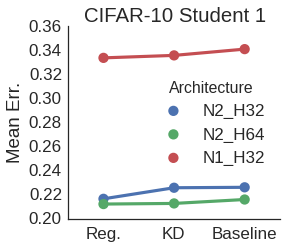

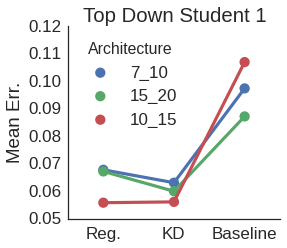

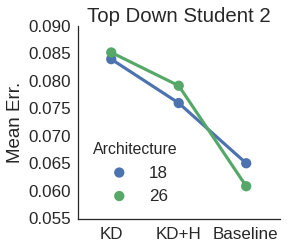

In [200]:
sns.set(style="white", font_scale=1.7)

df2 = pd.DataFrame(df.mean())
df2.columns = ['Mean Err.']

df2['Network'] = [s.split()[0]+' '+s.split()[1] for s in df2.index]
df2['Architecture'] = [s.split()[2] for s in df2.index]
df2['Algorithm'] = [s.split()[3] for s in df2.index]

df2 = df2[df2.Algorithm!="baseline_hint_based"]


df2


ax = sns.factorplot(x="Algorithm", y="Mean Err.", hue="Architecture", data=df2[df2.Network=='CIFAR_10 student_1'], aspect=1.1, legend_out=False)
ax.set(title="CIFAR-10 Student 1")
ax.set_xticklabels(["Reg.", "KD", "Baseline"])
ax.set_xlabels("")
ax = sns.factorplot(x="Algorithm", y="Mean Err.", hue="Architecture", data=df2[df2.Network=='Top_Down student_1'], aspect=1.1, legend_out=False)
ax.set(title="Top Down Student 1")
ax.set_xticklabels(["Reg.", "KD", "Baseline"])
ax.set_xlabels("")
ax = sns.factorplot(x="Algorithm", y="Mean Err.", hue="Architecture", data=df2[df2.Network=='Top_Down student_2'], aspect=1.1, legend_out=False)
ax.set(title="Top Down Student 2")
ax.set_xticklabels(["KD", "KD+H", "Baseline"])
ax.set_xlabels("")